In [93]:
import pandas as pd

df = pd.read_csv(r'C:\Users\User\AppData\Local\Temp\de8d58d2-dfe1-4a8c-8f6c-9396363ef0e9_estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip.0e9\ObesityDataSet_raw_and_data_sinthetic.csv')

In [94]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [95]:
df.rename(columns={'FAVC': 'HIGH_KCAL_FOOD_INTAKE', 'FCVC': 'vegetables_per_meal', 'NCP': 'meals_daily', 'CAEC': 'snacks', 'SCC': 'calorie_counting', 'FAF': 'phyisical_activity', 'TUE': 'tech_use', 'CALC':'alcohol_use', 'MTRANS': 'transport_form', 'NObeyesdad': 'obesity_lvl' }, inplace=True)
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'HIGH_KCAL_FOOD_INTAKE', 'vegetables_per_meal', 'meals_daily', 'snacks',
       'SMOKE', 'CH2O', 'calorie_counting', 'phyisical_activity', 'tech_use',
       'alcohol_use', 'transport_form', 'obesity_lvl'],
      dtype='object')


In [96]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'high_kcal_food_intake', 'vegetables_per_meal', 'meals_daily', 'snacks',
       'smoke', 'ch2o', 'calorie_counting', 'phyisical_activity', 'tech_use',
       'alcohol_use', 'transport_form', 'obesity_lvl'],
      dtype='object')


In [97]:
df.null_values = df.isnull().sum()
print(df.null_values)

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
high_kcal_food_intake             0
vegetables_per_meal               0
meals_daily                       0
snacks                            0
smoke                             0
ch2o                              0
calorie_counting                  0
phyisical_activity                0
tech_use                          0
alcohol_use                       0
transport_form                    0
obesity_lvl                       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_23592\413608792.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.null_values = df.isnull().sum()


In [98]:
df.duplicated_rows = df.duplicated().sum()
print(df.duplicated_rows)

24


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   float64
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   high_kcal_food_intake           2111 non-null   object 
 6   vegetables_per_meal             2111 non-null   float64
 7   meals_daily                     2111 non-null   float64
 8   snacks                          2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  ch2o                            2111 non-null   float64
 11  calorie_counting                2111 non-null   object 
 12  phyisical_activity              21

In [100]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2087 non-null   object 
 1   age                             2087 non-null   float64
 2   height                          2087 non-null   float64
 3   weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   high_kcal_food_intake           2087 non-null   object 
 6   vegetables_per_meal             2087 non-null   float64
 7   meals_daily                     2087 non-null   float64
 8   snacks                          2087 non-null   object 
 9   smoke                           2087 non-null   object 
 10  ch2o                            2087 non-null   float64
 11  calorie_counting                2087 non-null   object 
 12  phyisical_activity              2087 no

In [101]:
df.describe()

,age,height,weight,vegetables_per_meal,meals_daily,ch2o,phyisical_activity,tech_use
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [102]:

numerical_cols = df.select_dtypes(include='number').columns

# Exclude the 'height' column from rounding
cols_to_round = [col for col in numerical_cols if col != 'height']

# Round the values in the selected columns to whole numbers
df[cols_to_round] = df[cols_to_round].apply(lambda x: x.round(0).astype(int))


print(df.head())

   gender  age  height  weight family_history_with_overweight  \
0  Female   21    1.62      64                            yes   
1  Female   21    1.52      56                            yes   
2    Male   23    1.80      77                            yes   
3    Male   27    1.80      87                             no   
4    Male   22    1.78      90                             no   

  high_kcal_food_intake  vegetables_per_meal  meals_daily     snacks smoke  \
0                    no                    2            3  Sometimes    no   
1                    no                    3            3  Sometimes   yes   
2                    no                    2            3  Sometimes    no   
3                    no                    3            3  Sometimes    no   
4                    no                    2            1  Sometimes    no   

   ch2o calorie_counting  phyisical_activity  tech_use alcohol_use  \
0     2               no                   0         1          no   


Exploring Categorical Data

In [103]:
from IPython.display import display

for column in df.select_dtypes(include='object').columns:
    display(df[column].value_counts())
    print("\n")

gender
Male      1052
Female    1035
Name: count, dtype: int64

family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

high_kcal_food_intake
yes    1844
no      243
Name: count, dtype: int64

snacks
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

smoke
no     2043
yes      44
Name: count, dtype: int64

calorie_counting
no     1991
yes      96
Name: count, dtype: int64

alcohol_use
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

transport_form
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

obesity_lvl
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [104]:
# Convert all string values in object columns to lowercase
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x)
    print(df[column].value_counts())

gender
male      1052
female    1035
Name: count, dtype: int64
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64
high_kcal_food_intake
yes    1844
no      243
Name: count, dtype: int64
snacks
sometimes     1761
frequently     236
always          53
no              37
Name: count, dtype: int64
smoke
no     2043
yes      44
Name: count, dtype: int64
calorie_counting
no     1991
yes      96
Name: count, dtype: int64
alcohol_use
sometimes     1380
no             636
frequently      70
always           1
Name: count, dtype: int64
transport_form
public_transportation    1558
automobile                456
walking                    55
motorbike                  11
bike                        7
Name: count, dtype: int64
obesity_lvl
obesity_type_i         351
obesity_type_iii       324
obesity_type_ii        297
overweight_level_ii    290
normal_weight          282
overweight_level_i     276
insufficient_weight    267
Name: count, dtype: int64


~~ Univariate Analysis ~~

Bar Plots for Categorical Data:

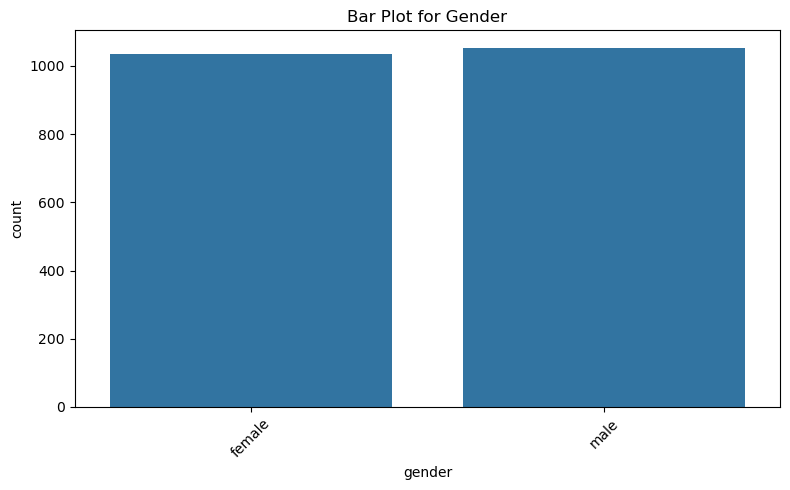

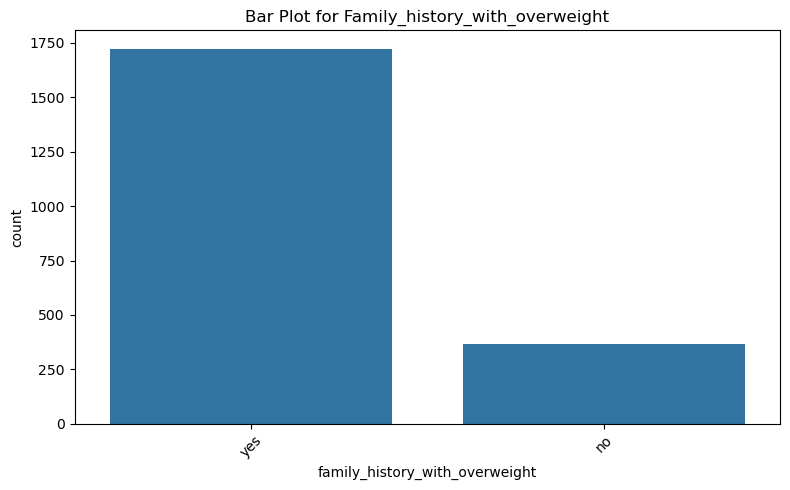

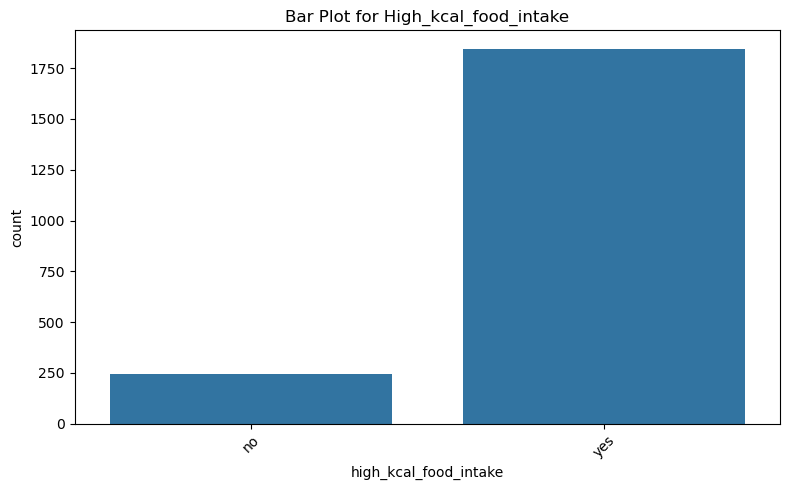

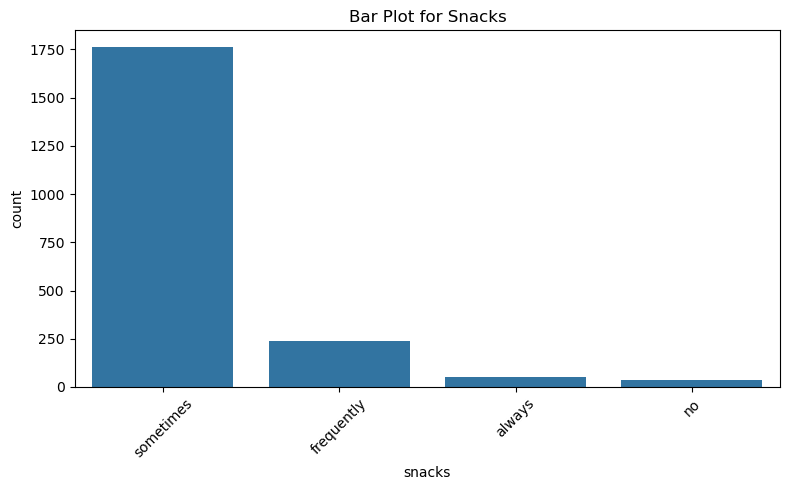

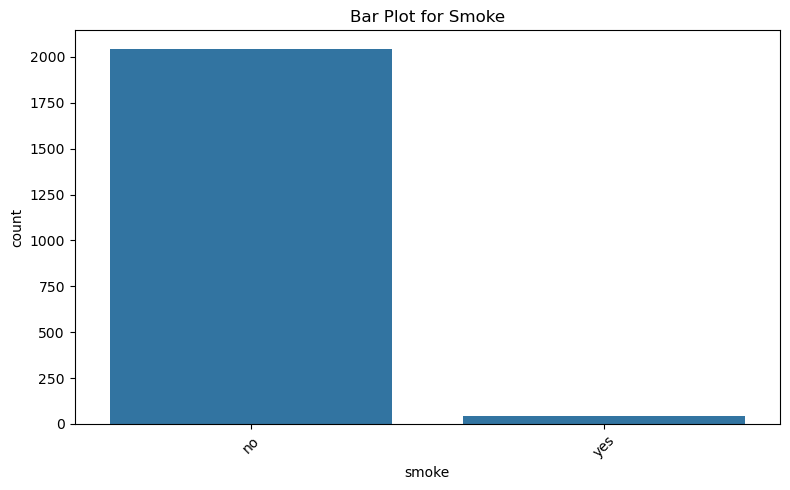

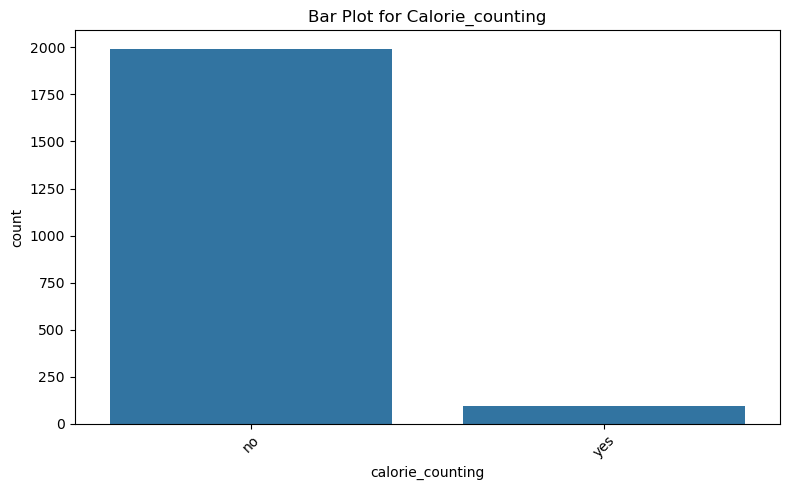

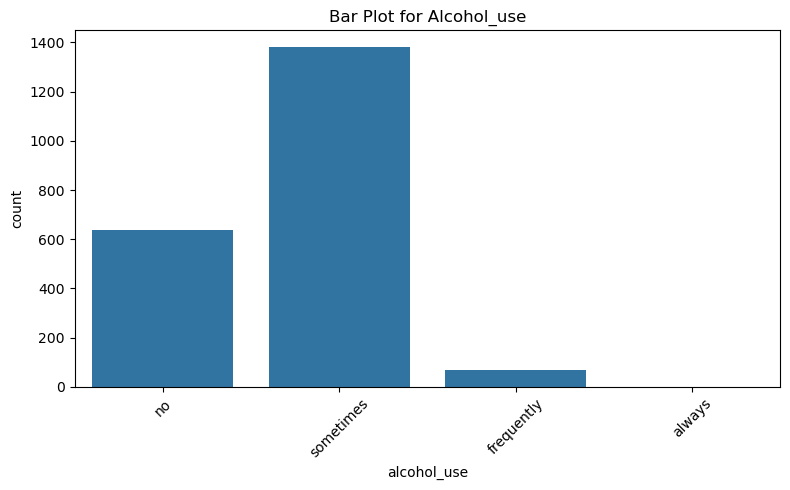

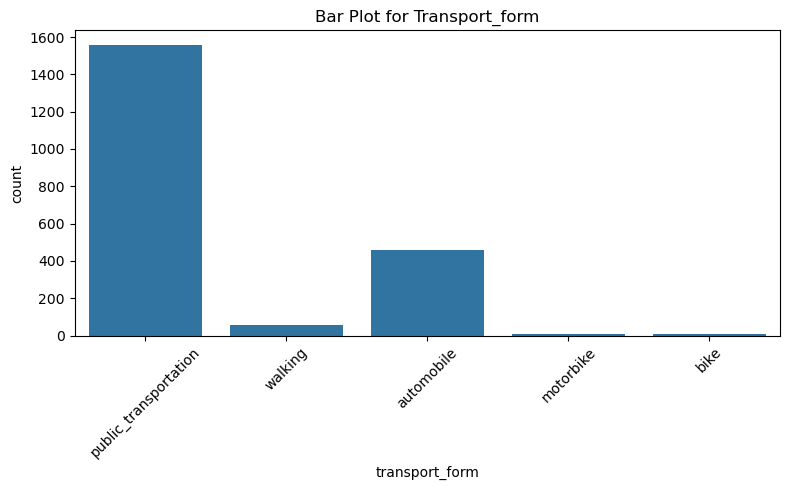

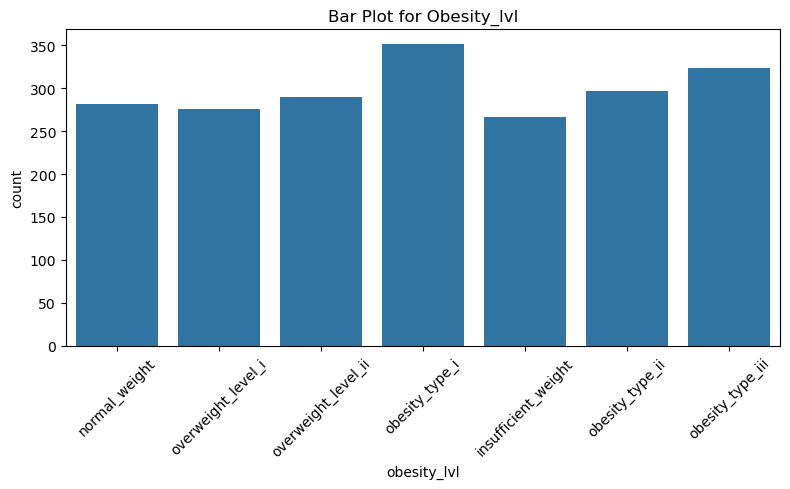

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical column and create a bar plot
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Plot for {column.capitalize()}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability, if needed
    plt.tight_layout()
    plt.show()

disclaimer* high_kcl_food_intake refers to the fact if the food with high calories is eaten in every meal, more or less oftn, not to daily calorie intake.

Numerical Variables:

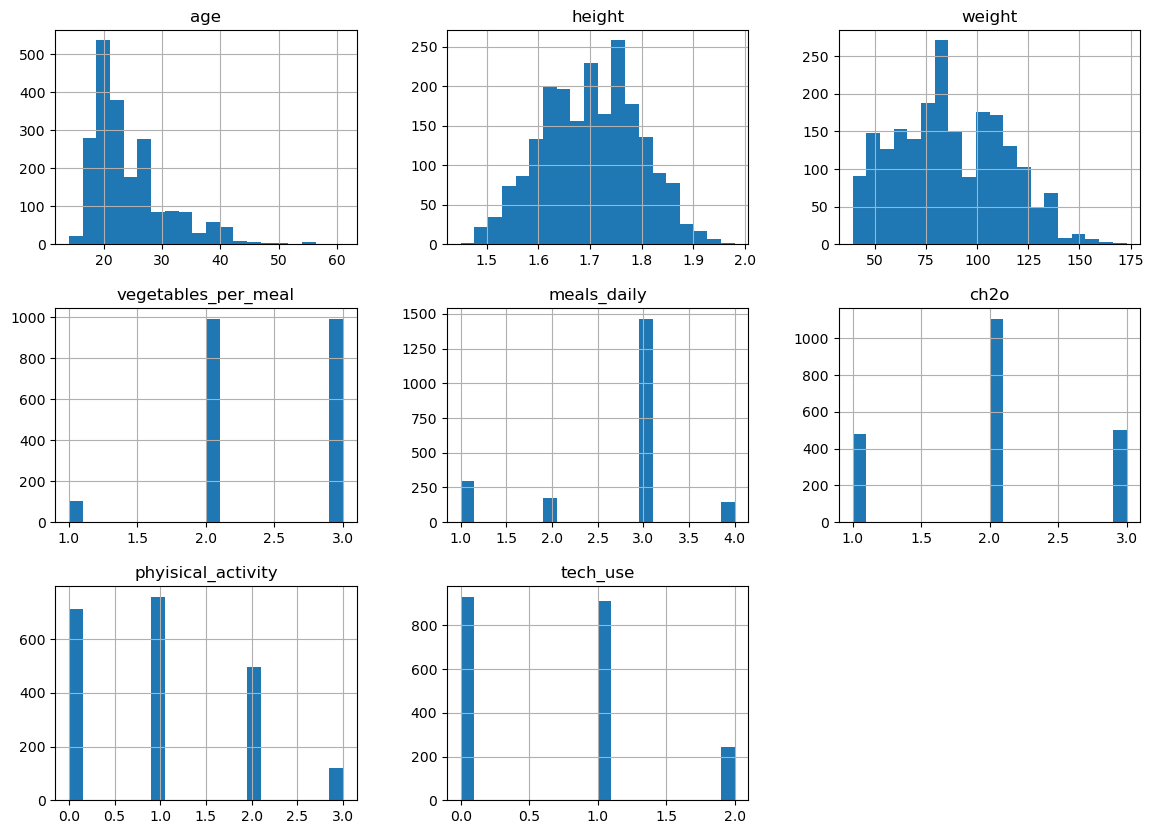

In [106]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

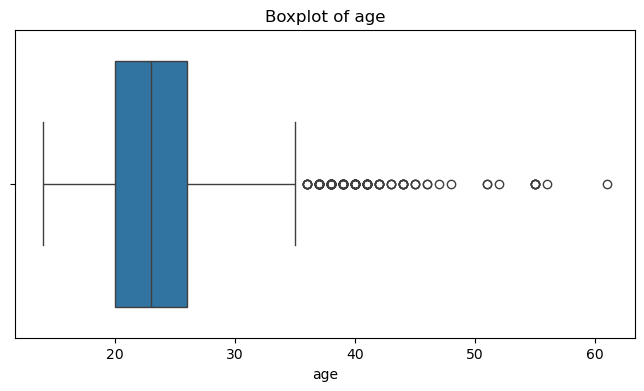

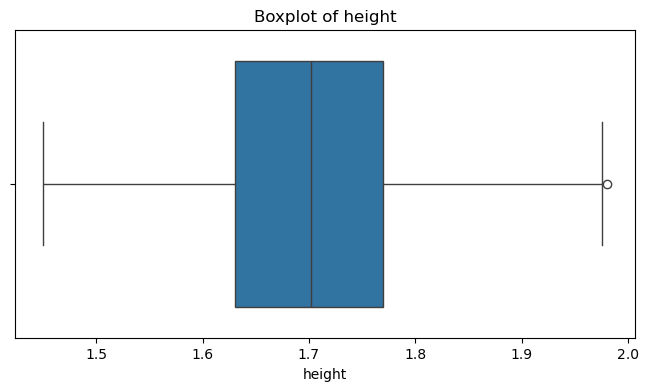

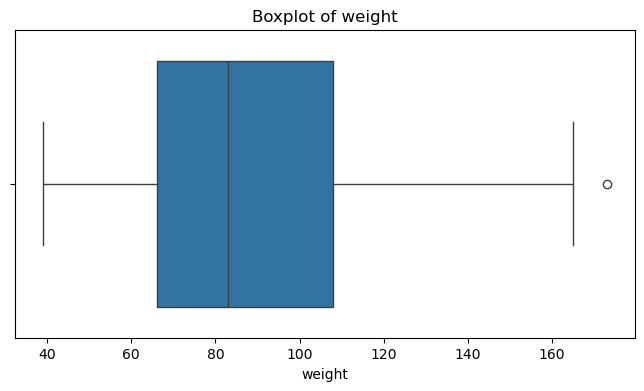

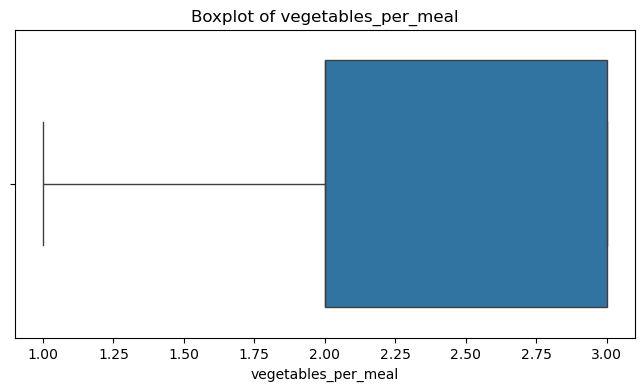

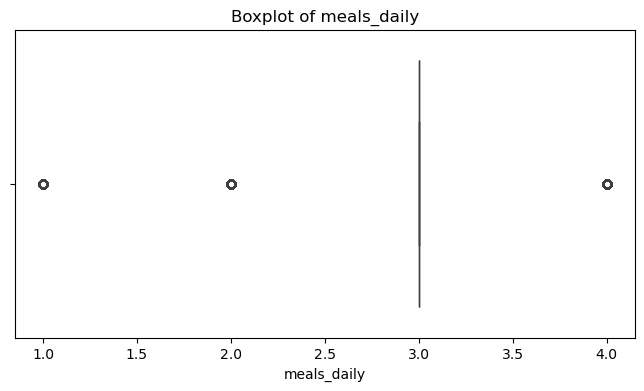

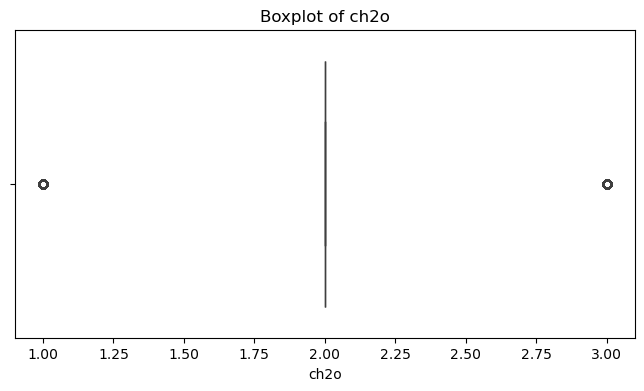

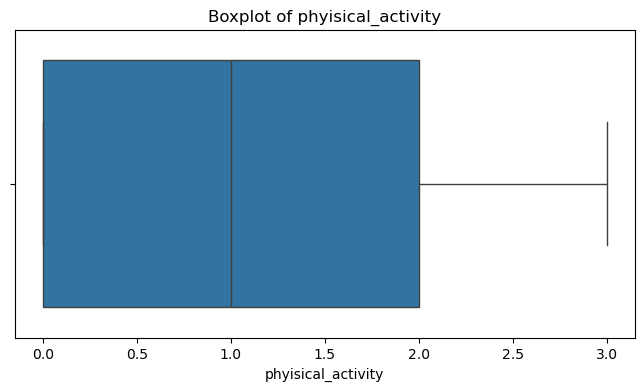

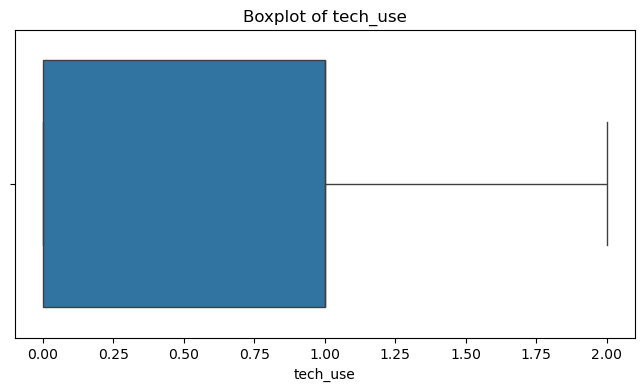

In [107]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_23592\3579177292.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


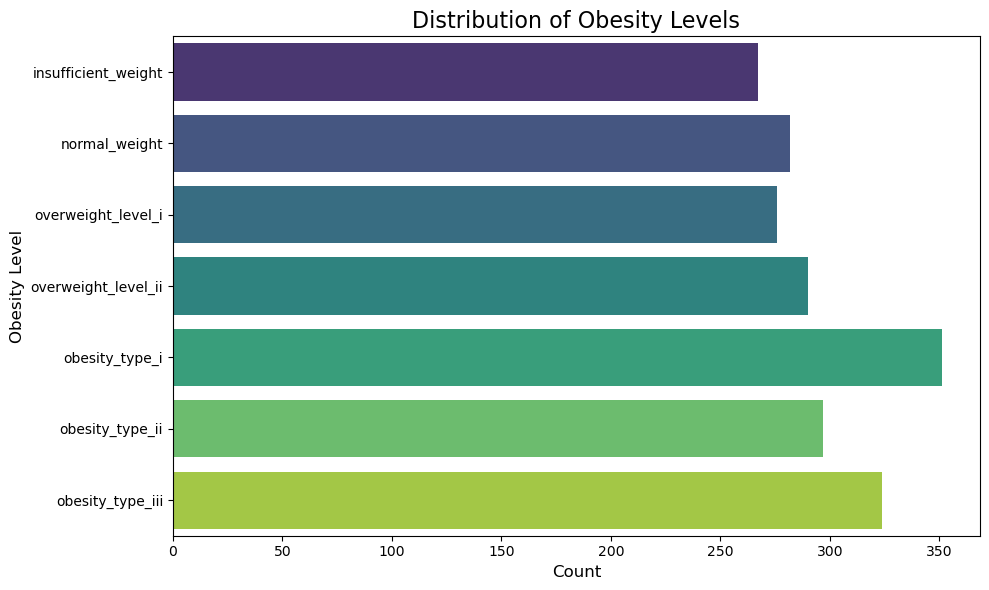

In [108]:
# Define the desired order for the y-axis (horizontal bar plot)
obesity_order = [
    'insufficient_weight',
    'normal_weight',
    'overweight_level_i',
    'overweight_level_ii',
    'obesity_type_i',
    'obesity_type_ii',
    'obesity_type_iii'
]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='obesity_lvl',
    order=obesity_order,
    palette='viridis'
)

plt.title('Distribution of Obesity Levels', fontsize=16)
plt.ylabel('Obesity Level', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

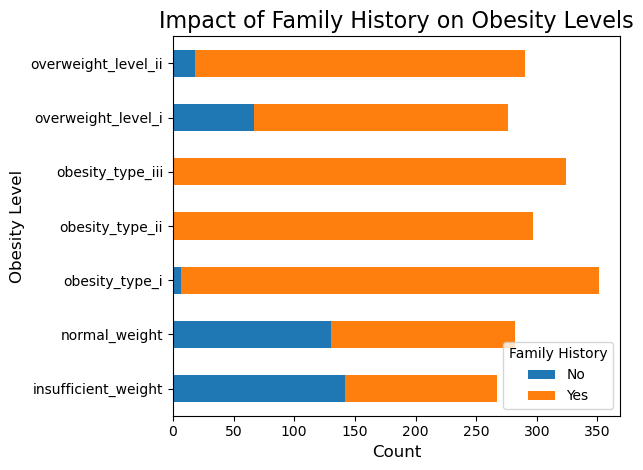

In [109]:
# Create a horizontal stacked bar plot
plt.figure(figsize=(10, 6))
family_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title("Impact of Family History on Obesity Levels", fontsize=16)
plt.ylabel("Obesity Level", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.legend(title="Family History", labels=["No", "Yes"])
plt.tight_layout()

# Display the plot
plt.show()


~~ Bivariate Analysis ~~

Correlation Matrix (Numerical Variables):

In [110]:
# Check for NaN values in 'obesity_lvl' column
nan_count = df['obesity_lvl'].isnull().sum()
print(f"Number of NaN values in 'obesity_lvl': {nan_count}")

Number of NaN values in 'obesity_lvl': 0


In [111]:
# Check for unique values in the column
print(df['obesity_lvl'].unique())

['normal_weight' 'overweight_level_i' 'overweight_level_ii'
 'obesity_type_i' 'insufficient_weight' 'obesity_type_ii'
 'obesity_type_iii']


In [113]:
# Reload the original obesity_lvl column from the CSV
original_df = pd.read_csv(r'C:\Users\User\AppData\Local\Temp\de8d58d2-dfe1-4a8c-8f6c-9396363ef0e9_estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip.0e9\ObesityDataSet_raw_and_data_sinthetic.csv')

# Map the original string values to numeric
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Lowercase the original column to match your cleaned data
df['obesity_lvl_numeric'] = original_df['NObeyesdad'].str.lower().map({
    k.lower(): v for k, v in obesity_mapping.items()
})

print(df[['obesity_lvl_numeric']].head())

   obesity_lvl_numeric
0                    1
1                    1
2                    1
3                    2
4                    3


Crosstabs for Categorical Variables:

obesity_lvl_numeric    0    1    2    3    4    5    6
gender                                                
female               169  137  145  103  156    2  323
male                  98  145  131  187  195  295    1


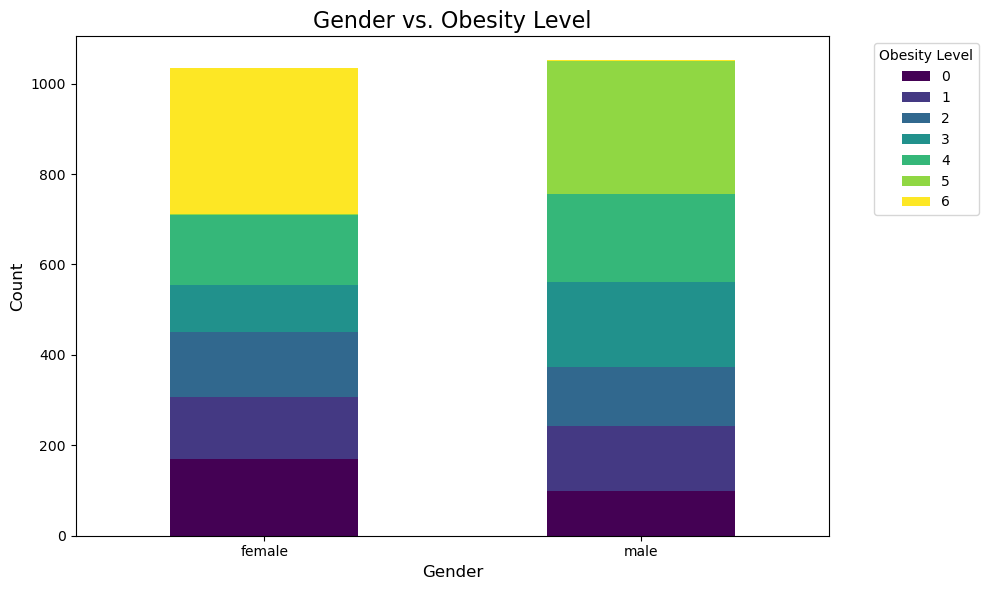

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'gender' and 'obesity_lvl_numeric'
crosstab_result = pd.crosstab(df['gender'], df['obesity_lvl_numeric'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('Gender vs. Obesity Level', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()

obesity_lvl_numeric    0    1    2    3    4    5    6
snacks                                                
always                 2   35    5    3    6    2    0
frequently           117   81   14   16    6    1    1
no                     3   10   21    1    1    1    0
sometimes            145  156  236  270  338  293  323


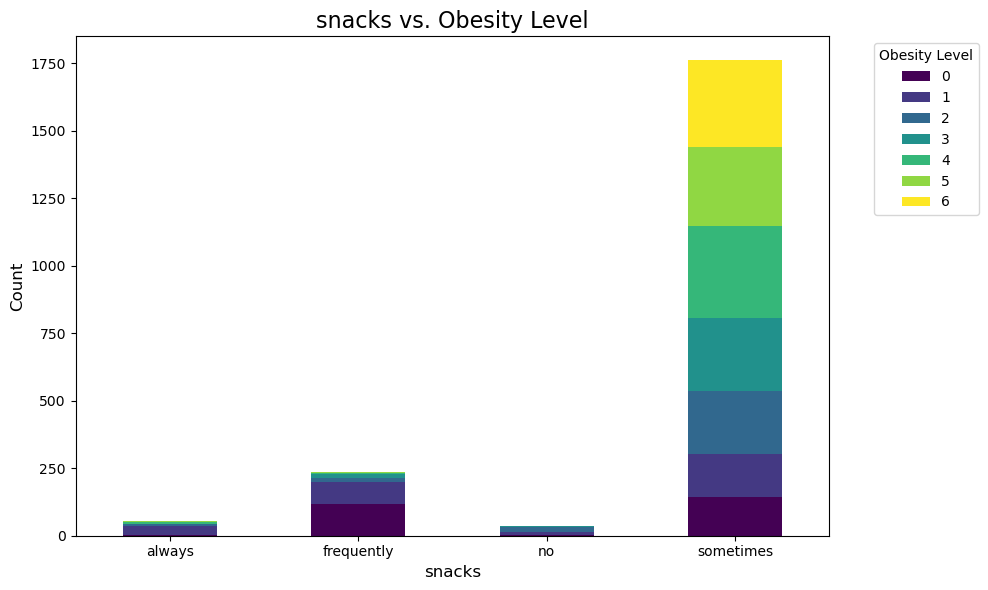

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'snacks' and 'obesity_lvl_numeric'
crosstab_result = pd.crosstab(df['snacks'], df['obesity_lvl_numeric'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('snacks vs. Obesity Level', fontsize=16)
plt.xlabel('snacks', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()

obesity_lvl_numeric               0    1    2    3    4    5    6
family_history_with_overweight                                   
no                              142  130   67   18    7    1    0
yes                             125  152  209  272  344  296  324


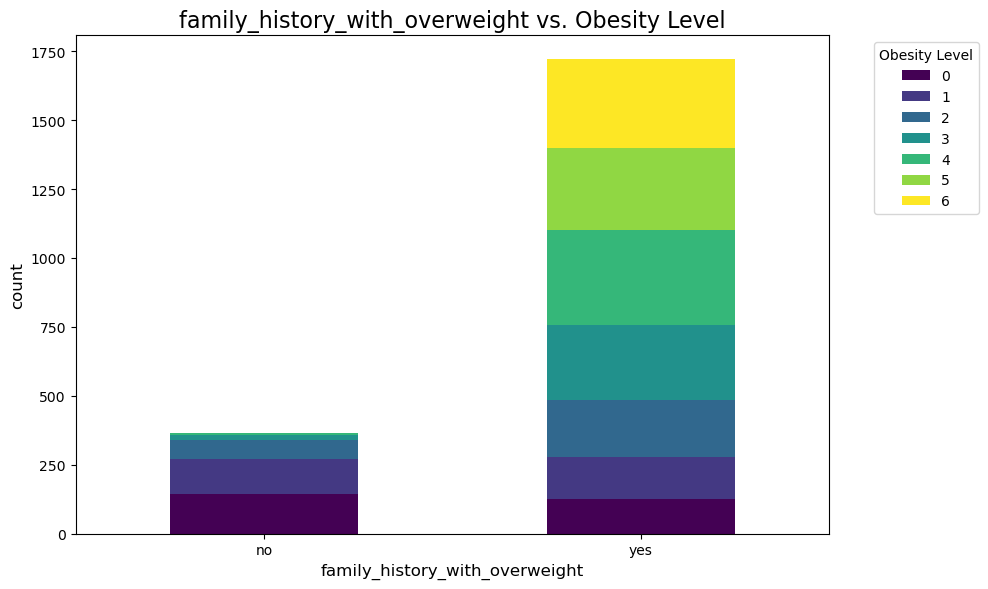

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example crosstab between 'family_history_with_overweight' and 'obesity_lvl_numeric'
crosstab_result = pd.crosstab(df['family_history_with_overweight'], df['obesity_lvl_numeric'])

# Print the crosstab for inspection
print(crosstab_result)

# Plotting the crosstab with a bar plot, stacking for clarity
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Enhance plot details
plt.title('family_history_with_overweight vs. Obesity Level', fontsize=16)
plt.xlabel('family_history_with_overweight', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()

# Show the plot
plt.show()

age                    0.280412
height                 0.124863
weight                 0.912501
vegetables_per_meal    0.196139
meals_daily            0.005712
ch2o                   0.139083
phyisical_activity    -0.202947
tech_use              -0.085925
Name: obesity_lvl_numeric, dtype: float64


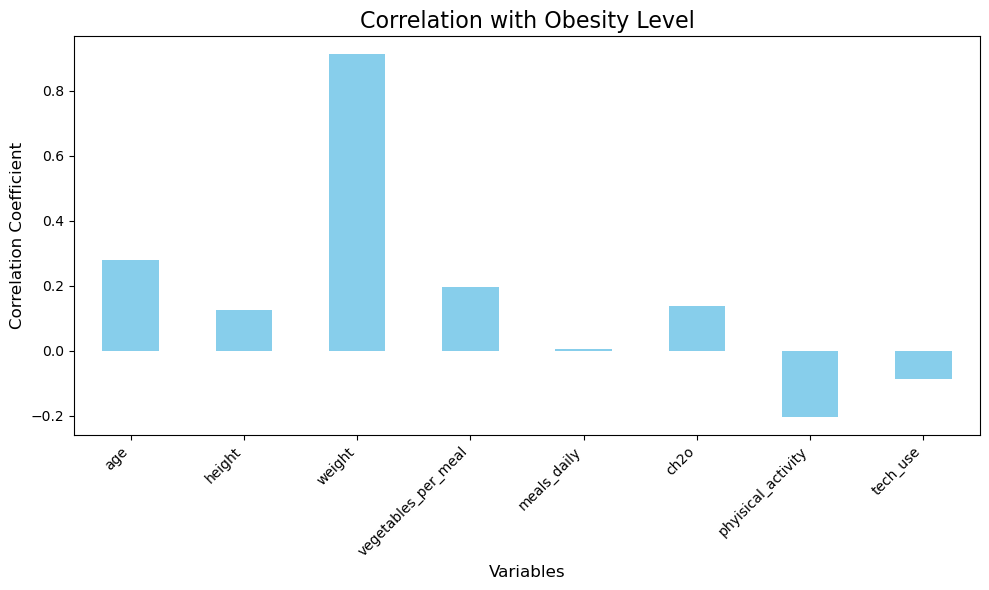

In [118]:
# Compute correlation matrix including 'obesity_lvl_numeric'
corr_matrix = df.corr(numeric_only=True)

# Compute correlation of all variables with 'obesity_lvl_numeric'
correlation_with_obesity = corr_matrix['obesity_lvl_numeric'].drop('obesity_lvl_numeric')

# Print correlations with 'obesity_lvl_numeric' for inspection
print(correlation_with_obesity)

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
correlation_with_obesity.plot(kind='bar', color='skyblue')
plt.title('Correlation with Obesity Level', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


DATA PREPROCESSING

Encoding Categorical Variables:

In [119]:
import pandas as pd


# List the categorical columns you want to encode
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


print(df_encoded.head())

   age  height  weight  vegetables_per_meal  meals_daily  ch2o  \
0   21    1.62      64                    2            3     2   
1   21    1.52      56                    3            3     3   
2   23    1.80      77                    2            3     2   
3   27    1.80      87                    3            3     2   
4   22    1.78      90                    2            1     2   

   phyisical_activity  tech_use  obesity_lvl_numeric  gender_male  ...  \
0                   0         1                    1        False  ...   
1                   3         0                    1        False  ...   
2                   2         1                    1         True  ...   
3                   2         0                    2         True  ...   
4                   0         0                    3         True  ...   

   transport_form_bike  transport_form_motorbike  \
0                False                     False   
1                False                     False   
2 

Normalization/Standardization:

In [120]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include='number').columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled_standard = df.copy()
df_scaled_standard[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show the first few rows of scaled data
print(df_scaled_standard.head())

   gender       age    height    weight family_history_with_overweight  \
0  female -0.526224 -0.887408 -0.873035                            yes   
1  female -0.526224 -1.960788 -1.178571                            yes   
2    male -0.212668  1.044677 -0.376539                            yes   
3    male  0.414444  1.044677  0.005380                             no   
4    male -0.369446  0.830001  0.119956                             no   

  high_kcal_food_intake  vegetables_per_meal  meals_daily     snacks smoke  \
0                    no            -0.728109     0.372182  sometimes    no   
1                    no             0.981186     0.372182  sometimes   yes   
2                    no            -0.728109     0.372182  sometimes    no   
3                    no             0.981186     0.372182  sometimes    no   
4                    no            -0.728109    -2.137489  sometimes    no   

       ch2o calorie_counting  phyisical_activity  tech_use alcohol_use  \
0 -0.016784 

MACHINE LEARNING

Feature Selection:

 Correlation Analysis:

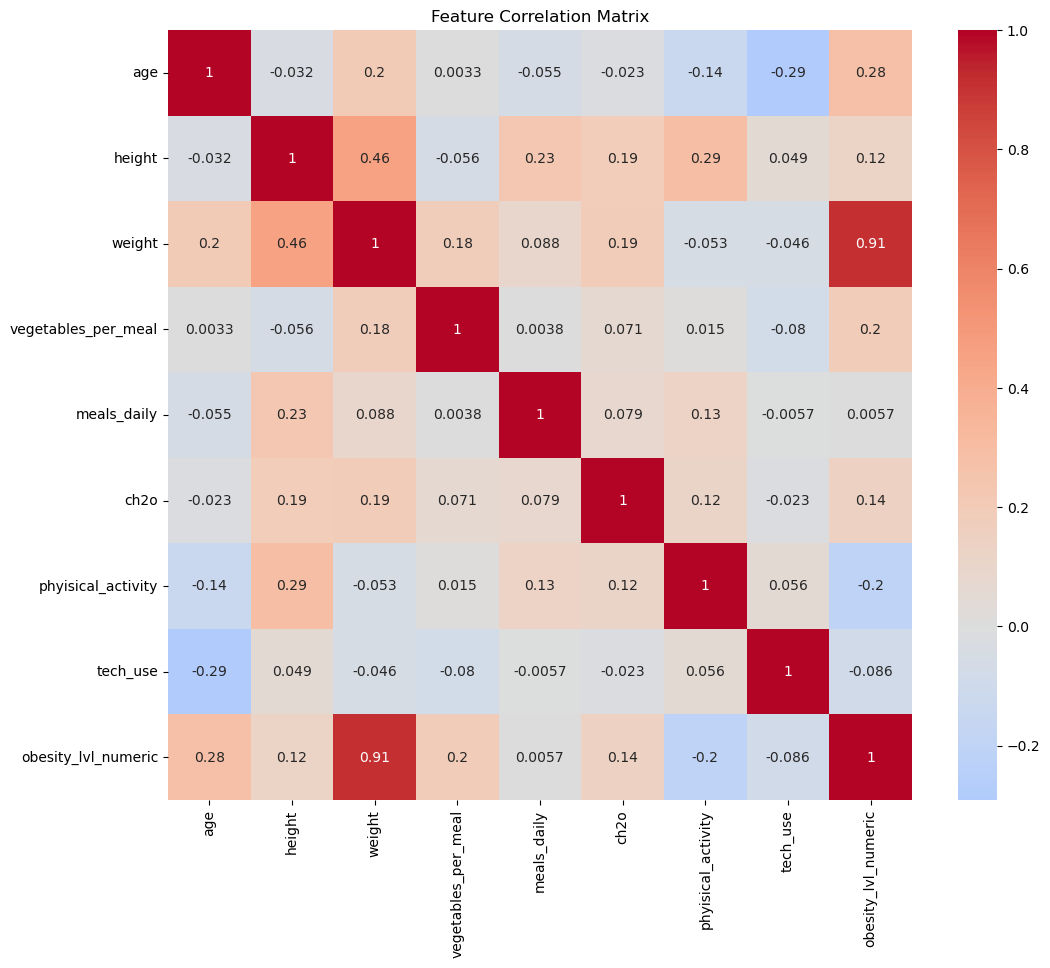

obesity_lvl_numeric    1.000000
weight                 0.912501
age                    0.280412
vegetables_per_meal    0.196139
ch2o                   0.139083
height                 0.124863
meals_daily            0.005712
tech_use              -0.085925
phyisical_activity    -0.202947
Name: obesity_lvl_numeric, dtype: float64


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Display correlations with the target variable, `obesity_lvl_numeric`
print(correlation_matrix['obesity_lvl_numeric'].sort_values(ascending=False))

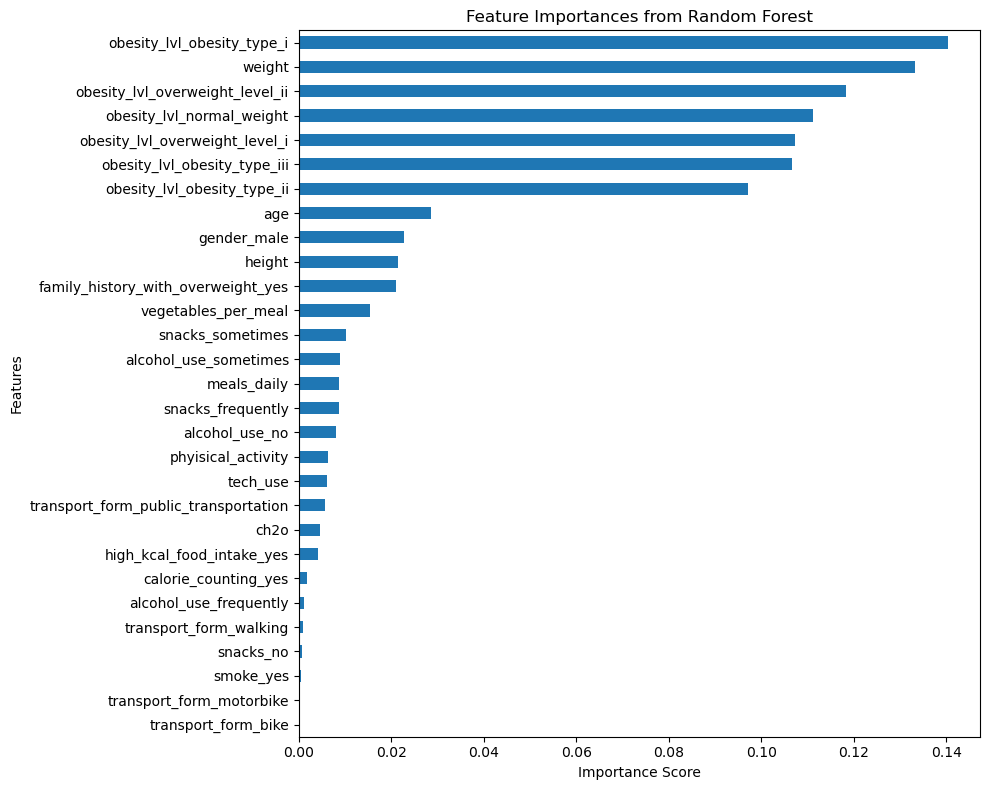

In [125]:
plt.figure(figsize=(10, 8))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Splitting the Data:

In [127]:
from sklearn.model_selection import train_test_split

# Use the one-hot encoded dataframe and correct column names
features = [
	'age',
	'family_history_with_overweight_yes',  # binary column from one-hot encoding
	'snacks_sometimes',                   # binary column from one-hot encoding
	'phyisical_activity',                 # correct spelling
	'vegetables_per_meal'
]
X = df_encoded[features]
y = df_encoded['obesity_lvl_numeric']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Choosing and Training the Model

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=5000, random_state=42)

# Train models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

 Evaluation

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluate Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

Random Forest:
Accuracy: 0.5773524720893142
Precision: 0.5696202536207722
Recall: 0.5773524720893142
F1 Score: 0.5707939630377953

Logistic Regression:
Accuracy: 0.39553429027113235
Precision: 0.413030775847128
Recall: 0.39553429027113235
F1 Score: 0.3376292469832459


In [131]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
gs_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted')
gs_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", gs_rf.best_params_)
print("Best F1 Score from grid search:", gs_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score from grid search: 0.569951545553089


max_depth=None: This means that the trees in the Random Forest are allowed to grow to their maximum possible depth. This setting helps capture complex patterns due to the large number of splits per tree.

min_samples_split=5: This parameter specifies the minimum number of samples required to split an internal node. Increasing this value leads to more conservative models by preventing splits that create small nodes, thus helping avoid overfitting.

n_estimators=100: This refers to using 100 trees in the forest. A common balance between model performance and computational efficiency is achieved with this number, as Random Forests can improve as more trees are added, albeit with diminishing returns.

Best F1 Score:

The F1 Score of approximately 0.570 (or 56.995%) indicates the weighted harmonic mean of precision and recall for your model, on your validation data.

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a valid parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],  # You can add more values or change as needed
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Corrected values replacing 'auto'
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
gs_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted', error_score='raise')

# Fit GridSearchCV
gs_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters from expanded search:", gs_rf.best_params_)
print("Best F1 Score from expanded grid search:", gs_rf.best_score_)

Best parameters from expanded search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score from expanded grid search: 0.5718578885812166


These results indicate a well-balanced set of hyperparameters that consider both model performance and generalization ability. Further improvements can be sought by examining additional features, resampling techniques, or alternative models.

Strategies to Address Class Imbalance

Resampling Techniques

 Using SMOTE for Over-sampling

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y) using the encoded DataFrame
X = df_encoded[features]
y = df_encoded['obesity_lvl_numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model after resampling
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = rf.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.570199258040155


Using Class Weights

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Train model with class weights
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_weighted = rf_weighted.predict(X_test)
print("F1 Score (weighted):", f1_score(y_test, y_pred_weighted, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))

F1 Score (weighted): 0.5785854808453806

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.60        87
           1       0.56      0.40      0.47        95
           2       0.51      0.50      0.51        80
           3       0.36      0.36      0.36        74
           4       0.52      0.51      0.52       105
           5       0.70      0.72      0.71        95
           6       0.78      0.95      0.86        91

    accuracy                           0.59       627
   macro avg       0.57      0.58      0.57       627
weighted avg       0.58      0.59      0.58       627



Combine Techniques

In [140]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest model with class weights on the resampled data
rf_combined = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_combined.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_combined = rf_combined.predict(X_test)
print("F1 Score (combined):", f1_score(y_test, y_pred_combined, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_combined))

F1 Score (combined): 0.570199258040155

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.61        87
           1       0.56      0.36      0.44        95
           2       0.45      0.49      0.47        80
           3       0.33      0.34      0.34        74
           4       0.54      0.50      0.52       105
           5       0.68      0.75      0.71        95
           6       0.78      0.95      0.86        91

    accuracy                           0.58       627
   macro avg       0.56      0.57      0.56       627
weighted avg       0.57      0.58      0.57       627



Key Observations:
Class 6 Performance: This class shows exceptional recall and precision, indicating that your model is particularly effective at identifying instances in this class.

Lower Performance Classes: Classes 1, 2, 3 show lower precision and recall, which might indicate that these classes are either less informative or more confused with other classes.

Overall Performance: With an F1 Score (combined) of 0.57, the model shows moderate balance between precision and recall, consistent with the typical challenges associated with multi-class and imbalanced datasets.

Evaluation with Precision-Recall Curve

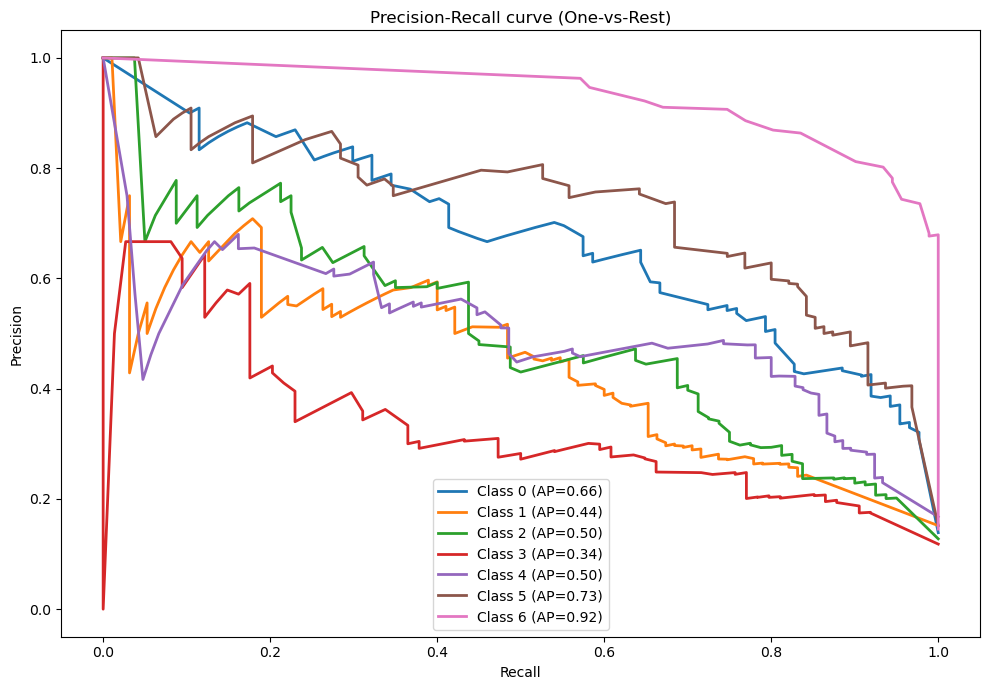

Average Precision Score for class 0: 0.6649
Average Precision Score for class 1: 0.4369
Average Precision Score for class 2: 0.5039
Average Precision Score for class 3: 0.3352
Average Precision Score for class 4: 0.4957
Average Precision Score for class 5: 0.7263
Average Precision Score for class 6: 0.9156


In [142]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the list of unique classes
classes = np.unique(y_test)
# Binarize the output
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_combined.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))
average_precisions = []
for i, class_label in enumerate(classes):
	precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
	avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
	average_precisions.append(avg_precision)
	plt.plot(recall, precision, lw=2, label=f'Class {class_label} (AP={avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (One-vs-Rest)')
plt.legend()
plt.tight_layout()
plt.show()

# Print average precision for each class
for i, class_label in enumerate(classes):
	print(f"Average Precision Score for class {class_label}: {average_precisions[i]:.4f}")

Note: class 0-6 are 0 = insufficient_weight, 1 = normal weight, 2 = overweight_level_I, 3 = overweight_level_II, 4 = obesity_type_I, 5 = obesity_type_II, 6 = obesity_type_III
    